In [1]:
!pip install riskfolio-lib --quiet

In [2]:
!pip install yfinance --quiet

In [3]:
!pip install -U matplotlib --quiet

In [4]:
import yfinance as yf
import riskfolio as rp
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

start = "2019-01-01"
end = "2022-01-01"

assets = ["BTC-USD", "ETH-USD", "LTC-USD"]
data = yf.download(assets, start = start, end = end)

[*********************100%***********************]  3 of 3 completed


In [5]:
returns = data["Adj Close"].pct_change().dropna()

In [6]:
returns

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2019-01-02,0.025989,0.101039,0.045458
2019-01-03,-0.027050,-0.038135,-0.042083
2019-01-04,0.005467,0.036523,0.011786
2019-01-05,-0.003246,0.006836,0.078160
2019-01-06,0.060189,0.013542,0.124853
...,...,...,...
2021-12-28,-0.060259,-0.058613,-0.064115
2021-12-29,-0.024042,-0.045348,-0.002565
2021-12-30,0.015791,0.023514,0.019059


### Variables

In [7]:
method_mu = 'hist'
method_cov = 'hist'
hist = True
model = 'Classic'
rm = 'MV'
obj = 'Sharpe' 
# obj = 'MinRisk' or 'MaxRet'
rf = 0
l = 0

"""
Possible Risk Model values are:
’MV’: Standard Deviation.
’MAD’: Mean Absolute Deviation.
’GMD’: Gini Mean Difference.
’MSV’: Semi Standard Deviation.
’FLPM’: First Lower Partial Moment (Omega Ratio).
’SLPM’: Second Lower Partial Moment (Sortino Ratio).
’VaR’: Value at Risk.
’CVaR’: Conditional Value at Risk.
’TG’: Tail Gini.
’EVaR’: Entropic Value at Risk.
’WR’: Worst Realization (Minimax).
’RG’: Range of returns.
’CVRG’: CVaR range of returns.
’TGRG’: Tail Gini range of returns.
’MDD’: Maximum Drawdown of uncompounded cumulative returns (Calmar Ratio).
’ADD’: Average Drawdown of uncompounded cumulative returns.
’DaR’: Drawdown at Risk of uncompounded cumulative returns.
’CDaR’: Conditional Drawdown at Risk of uncompounded cumulative returns.
’EDaR’: Entropic Drawdown at Risk of uncompounded cumulative returns.
’UCI’: Ulcer Index of uncompounded cumulative returns.
’MDD_Rel’: Maximum Drawdown of compounded cumulative returns (Calmar Ratio).
’ADD_Rel’: Average Drawdown of compounded cumulative returns.
’CDaR_Rel’: Conditional Drawdown at Risk of compounded cumulative returns.
’EDaR_Rel’: Entropic Drawdown at Risk of compounded cumulative returns.
’UCI_Rel’: Ulcer Index of compounded cumulative returns.
"""

### Optimize

In [8]:
port = rp.Portfolio(returns = returns)
#https://riskfolio-lib.readthedocs.io/en/latest/portfolio.html#module-Portfolio

port.uppermdd = 0.65
port.lowerret = 0.7/365

port.assets_stats(method_mu = method_mu, method_cov = method_cov)
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

###Ploting

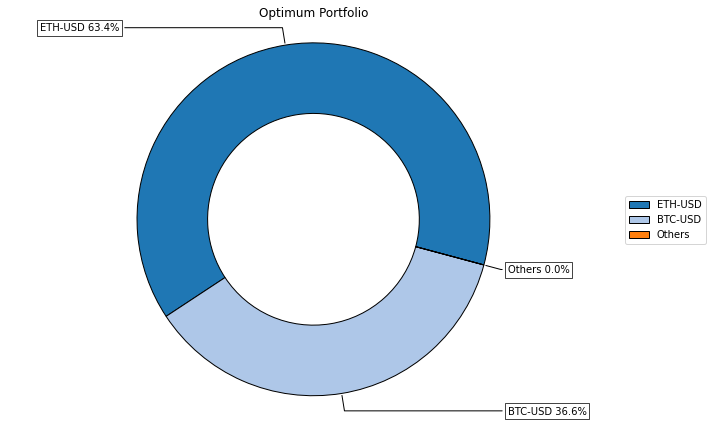

In [9]:
ax = rp.plot_pie(w=w, title='Optimum Portfolio', height=6, width=10, cmap="tab20", ax=None)

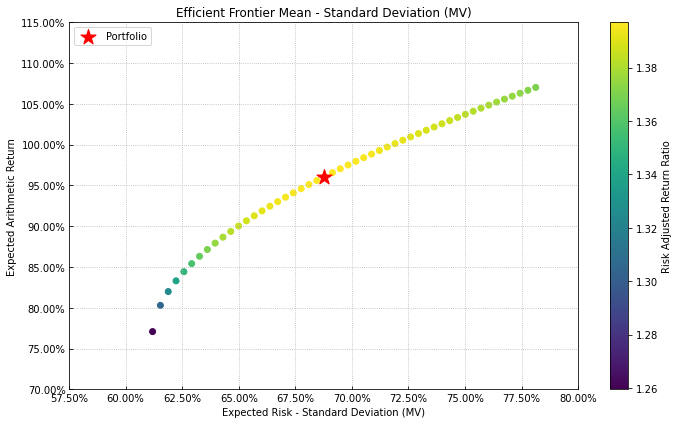

In [12]:
frontier = port.efficient_frontier(model = model, rm = rm, points=50, hist=hist)
ax = rp.plot_frontier(w_frontier=frontier, mu = port.mu, cov=port.cov, returns=returns, rm=rm, rf=rf, cmap='viridis', w=w)

In [13]:
frontier

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
BTC-USD,1.000000e+00,8.925227e-01,8.360633e-01,7.921352e-01,7.548014e-01,7.217024e-01,6.916146e-01,6.638067e-01,6.378012e-01,6.132649e-01,...,1.103186e-01,9.765156e-02,8.509624e-02,7.264825e-02,6.030337e-02,4.805801e-02,3.590834e-02,2.385090e-02,1.188252e-02,6.941373e-10
ETH-USD,1.968103e-08,1.074772e-01,1.639367e-01,2.078648e-01,2.451986e-01,2.782976e-01,3.083854e-01,3.361933e-01,3.621987e-01,3.867351e-01,...,8.896814e-01,9.023484e-01,9.149038e-01,9.273518e-01,9.396966e-01,9.519420e-01,9.640917e-01,9.761491e-01,9.881175e-01,1.000000e+00
LTC-USD,3.277043e-09,2.740982e-08,5.132086e-09,3.512055e-09,1.591953e-09,1.342105e-09,1.146173e-09,4.974844e-08,1.870706e-08,1.879066e-08,...,6.198569e-09,4.347657e-09,2.645966e-09,1.368528e-09,2.402392e-08,1.288453e-08,6.604238e-09,4.898577e-09,4.885525e-10,5.282124e-10


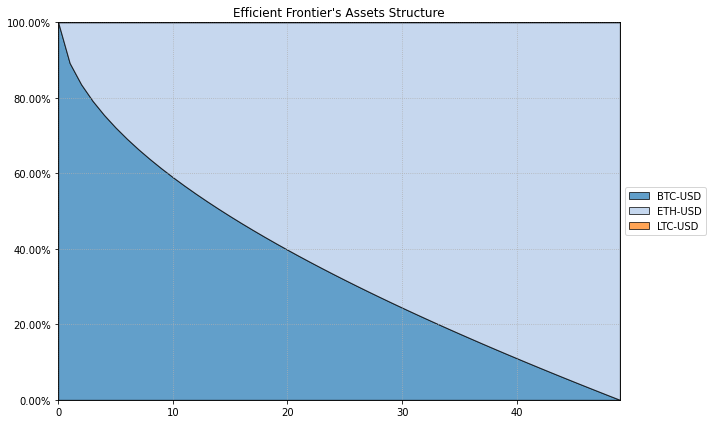

In [14]:
ax = rp.plot_frontier_area(w_frontier = frontier, cmap='tab20')

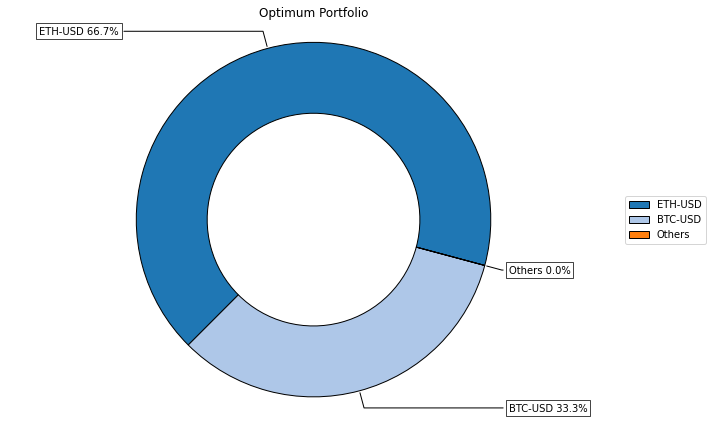

In [15]:
import pandas as pd
ax = rp.plot_pie(w=pd.DataFrame(frontier[24]), title='Optimum Portfolio', height=6, width=10, cmap="tab20", ax=None)

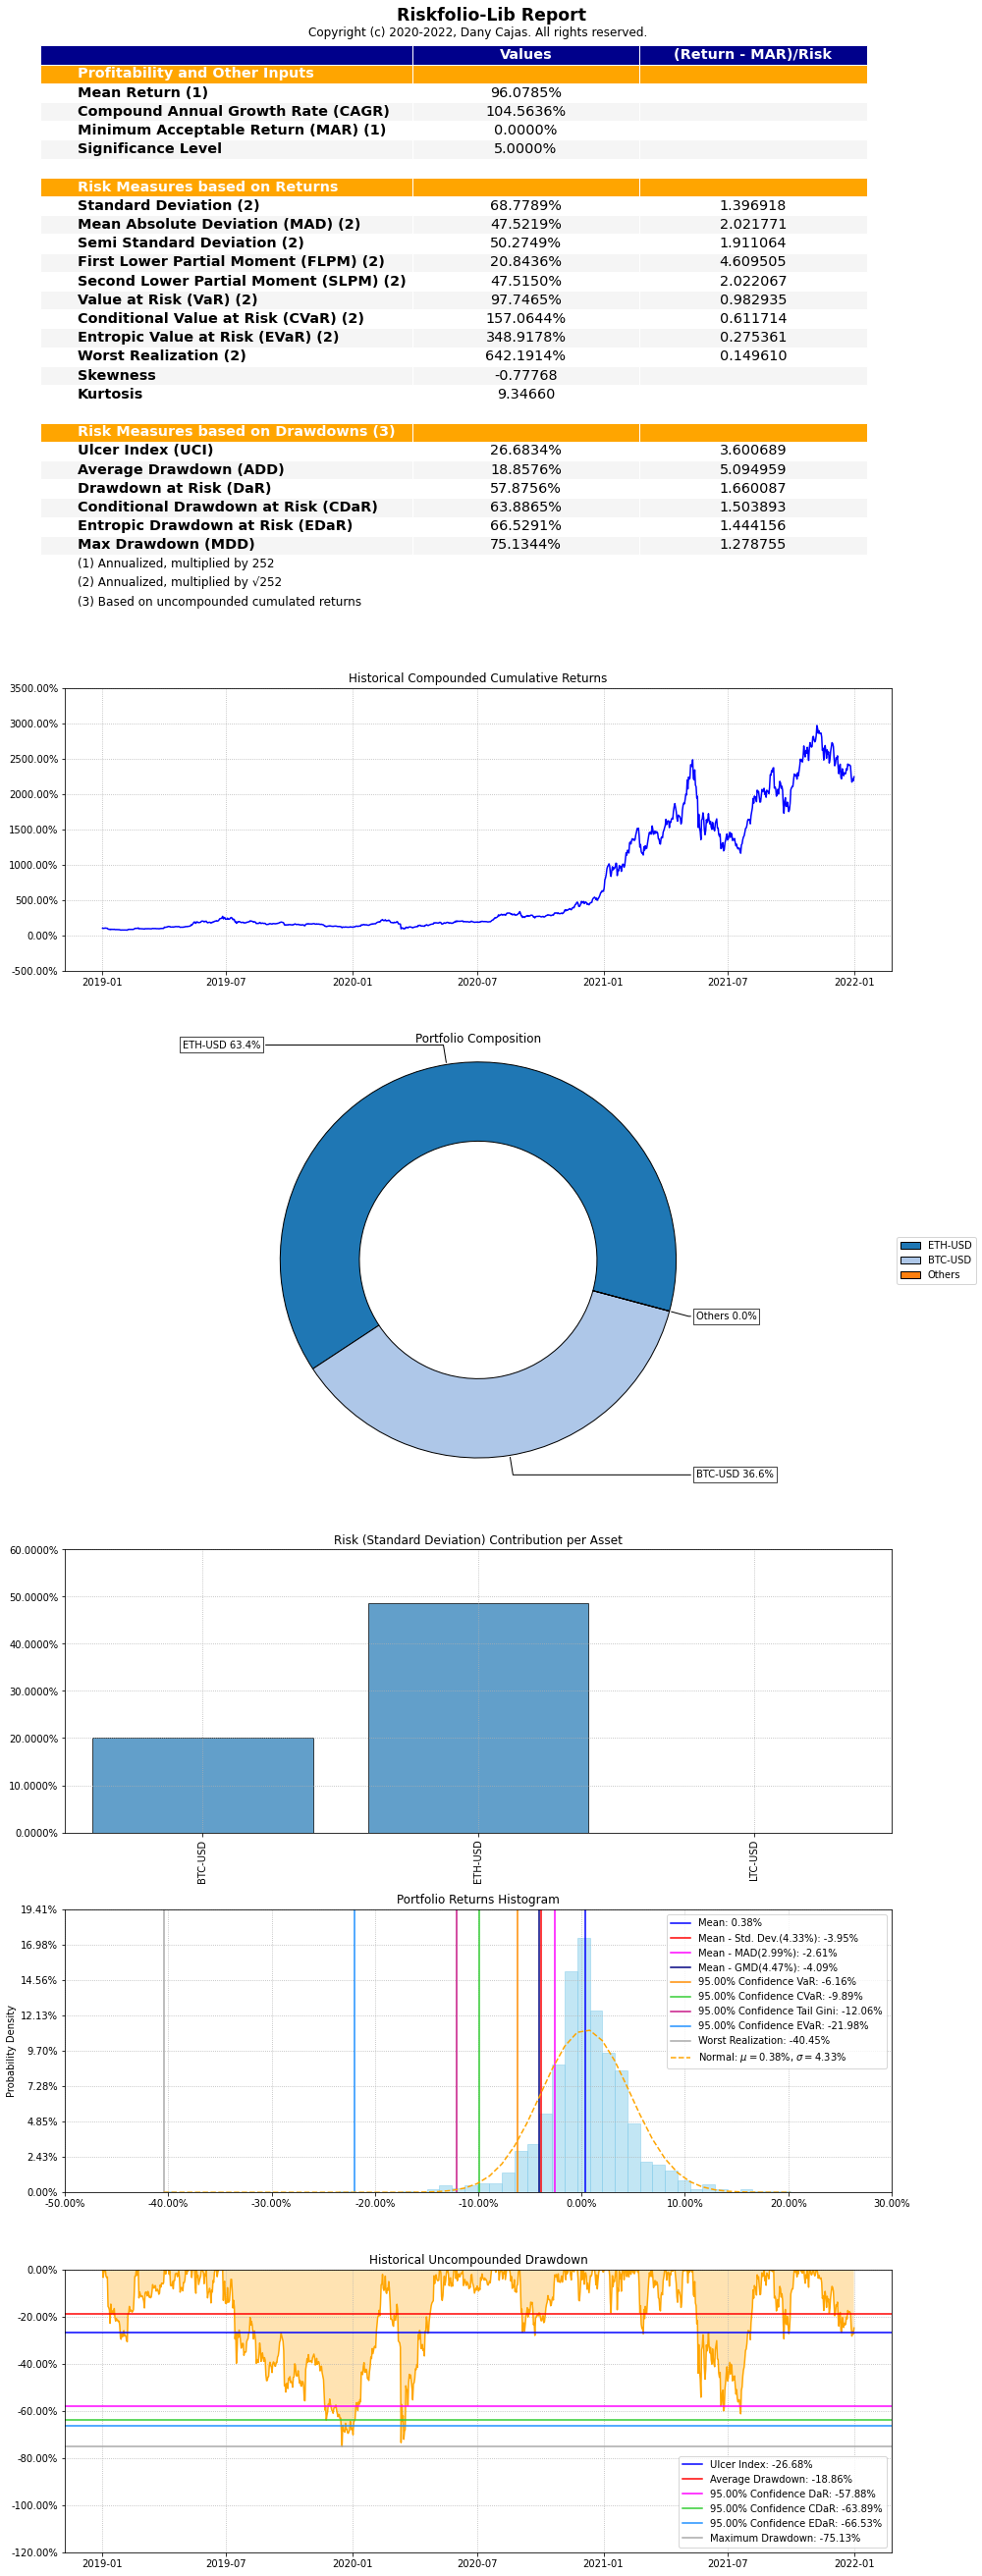

In [16]:
ax = rp.jupyter_report(returns, w, rm=rm)

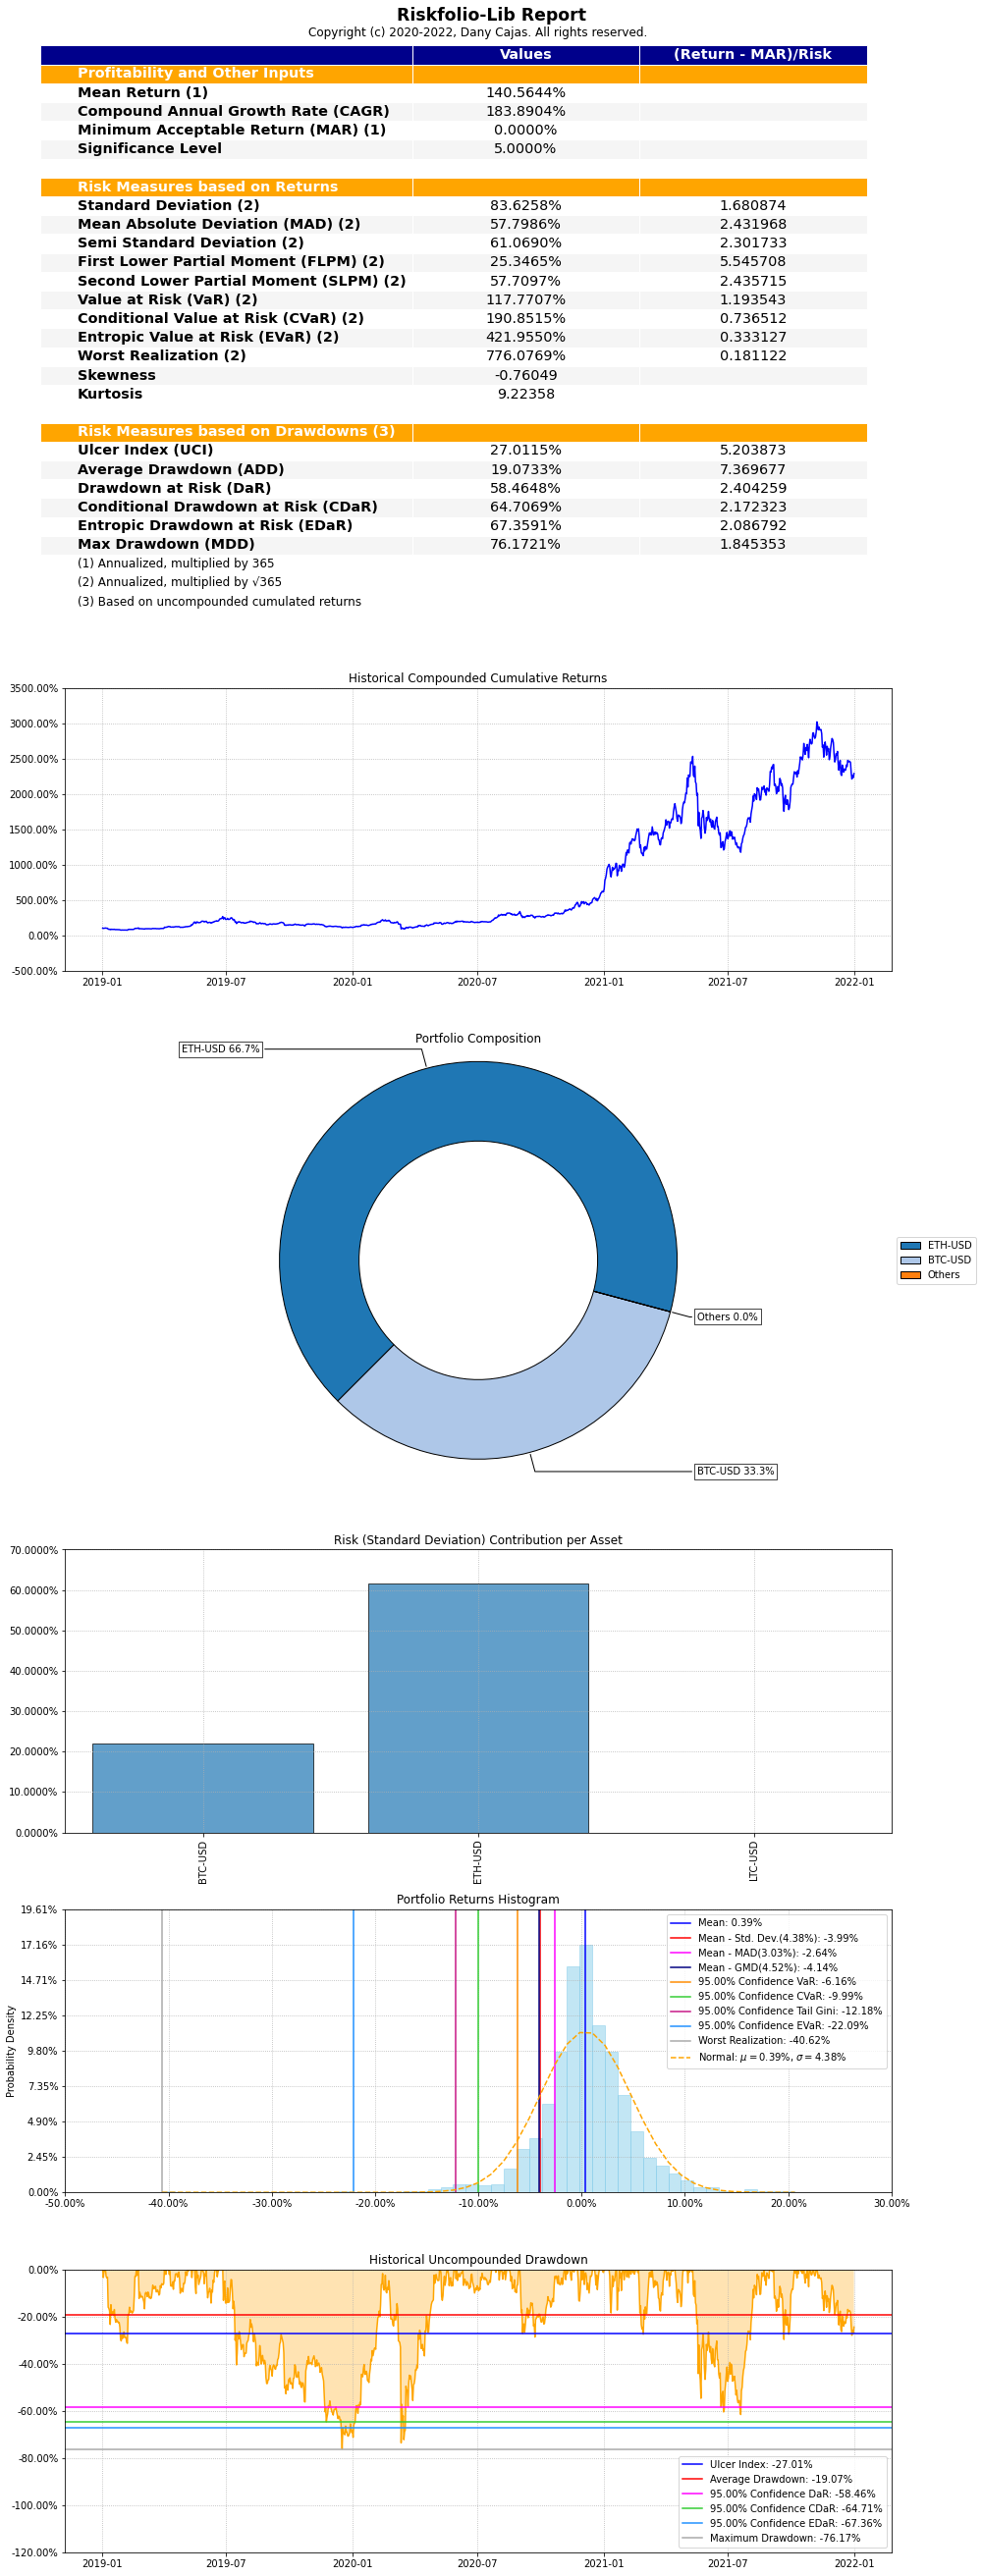

In [19]:
ax = rp.jupyter_report(returns, pd.DataFrame(frontier[24]), rm=rm, t_factor = 365, days_per_year=365)